# Data Cleaning and Processing

In [1]:
# Import the data package before analysis

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

# Read and load the xlsx dataset file
mydata = pd.read_excel('INF2178_A1_data.xlsx')

# Check the first 5 rows of dataset
mydata.head(5)

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [2]:
# Check the general information of dataset
mydata.info()

# Check the descriptive statistical description of the dataset
mydata.describe()

# Get the statistical description of categorical variables
cate_stats = mydata.describe()

# Get the statistical description of numerical variables
num_stats = mydata.describe()

# Display the results
print(cate_stats)
print(num_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [3]:
# Check if the dataset has the null values, and sum-up the null values
mydata.isnull().sum()

OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                 35
SECTOR                        0
PROGRAM_MODEL                 2
OVERNIGHT_SERVICE_TYPE        2
PROGRAM_AREA                  2
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18545
OCCUPIED_BEDS             18545
CAPACITY_ACTUAL_ROOM      32399
OCCUPIED_ROOMS            32399
dtype: int64

In [4]:
# Dealing with the missing values for 'PROGRAM_NAME','PROGRAM_MODEL','OVERNIGHT_SERVICE_TYPE','PROGRAM_AREA'; and drop the null values.
colnames = ['PROGRAM_NAME', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA']
mydata.dropna(subset=colnames,inplace = True)


# Checking the null values again
null_values_new = mydata.isnull().sum()
null_values_new

OCCUPANCY_DATE                0
ORGANIZATION_NAME             0
PROGRAM_ID                    0
PROGRAM_NAME                  0
SECTOR                        0
PROGRAM_MODEL                 0
OVERNIGHT_SERVICE_TYPE        0
PROGRAM_AREA                  0
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       18512
OCCUPIED_BEDS             18512
CAPACITY_ACTUAL_ROOM      32397
OCCUPIED_ROOMS            32397
dtype: int64

# Exploratory Data Analysis (EDA) with Visualization tools

### Data Visualization Through Numerical Fields (SERVICE_USER_COUNT, CAPACITY_ACTUAL_BED, OCCUPIED_BEDS, CAPACITY_ACTUAL_ROOM, OCCUPIED_ROOMS)

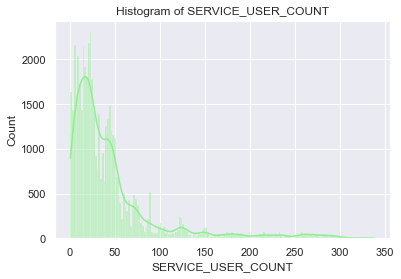

In [5]:
# Using the seaborn to visualize the distribution of the numeric variable:"SERVICE_USER_COUNT" with histogram.
sns.set(style="darkgrid")
sns.histplot(mydata['SERVICE_USER_COUNT'], kde=True, color='lightgreen')

# Set the title of the histogram
plt.title('Histogram of SERVICE_USER_COUNT')

# Show the plot
plt.show()

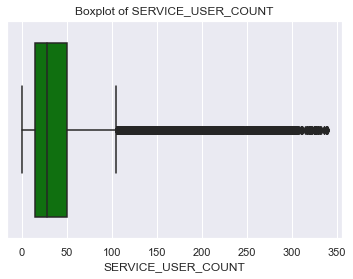

In [6]:
# Using the boxplot to visualized the overall distribution of numeric variable:"SERVICE_USER_COUNT".
sns.boxplot(x=mydata['SERVICE_USER_COUNT'], color='green')

# Set the title of the boxplot
plt.title('Boxplot of SERVICE_USER_COUNT')

# Show the plot
plt.show()

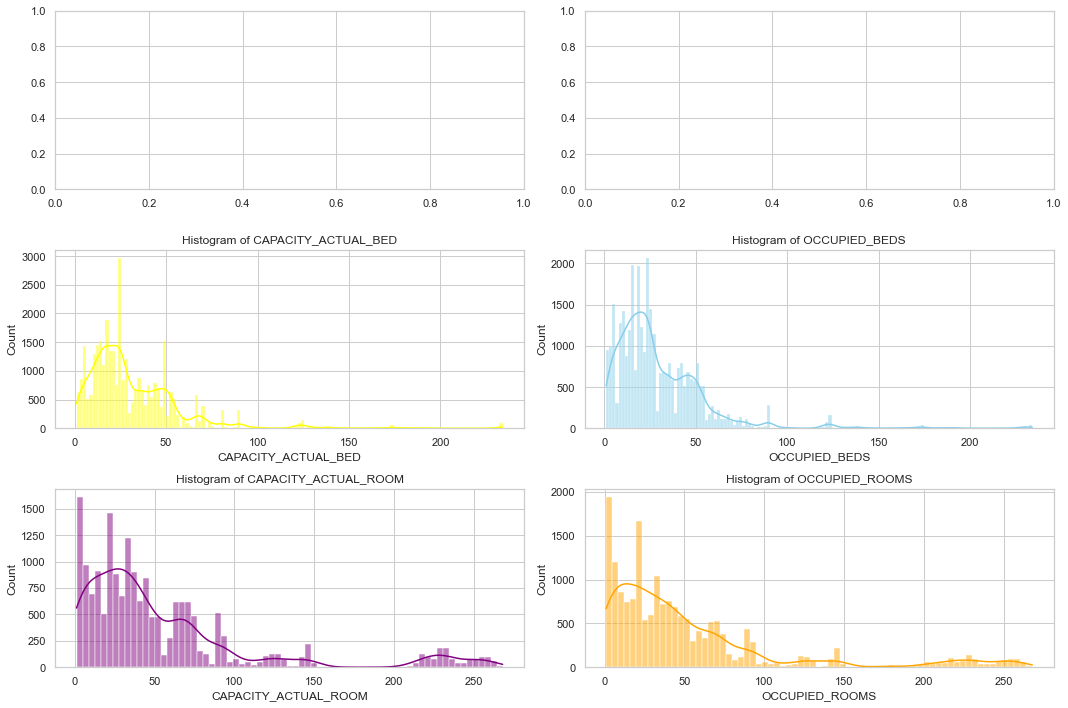

In [7]:
# Set the "whitegrid" background for plots.
sns.set(style="whitegrid")

# Preparing the figure layout.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Plotting histograms for numerical variables.
sns.histplot(mydata['CAPACITY_ACTUAL_BED'].dropna(), kde=True, ax=axes[1,0], color='yellow')
sns.histplot(mydata['OCCUPIED_BEDS'].dropna(), kde=True, ax=axes[1,1], color='skyblue')
sns.histplot(mydata['CAPACITY_ACTUAL_ROOM'].dropna(), kde=True, ax=axes[2,0], color='purple')
sns.histplot(mydata['OCCUPIED_ROOMS'].dropna(), kde=True, ax=axes[2,1], color='orange')

# Setting the titles for the plots
axes[1,0].set_title('Histogram of CAPACITY_ACTUAL_BED')
axes[1,1].set_title('Histogram of OCCUPIED_BEDS')
axes[2,0].set_title('Histogram of CAPACITY_ACTUAL_ROOM')
axes[2,1].set_title('Histogram of OCCUPIED_ROOMS')

# Setting layout to avoid overlapping
plt.tight_layout()
plt.show()

### Data Visualization Through Categorical Fields (SECTOR, PROGRAM_MODEL, OVERNIGHT_SERVICE_TYPE, PROGRAM_AREA, CAPACITY_TYPE)

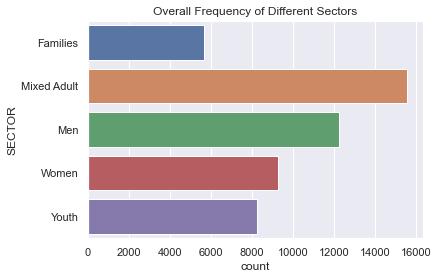

In [8]:
# Setting the "darkgrid" background for plot
sns.set(style="darkgrid")

# Create a countplot to show the frequency of different SECTORS.
sns.countplot(y=mydata['SECTOR'])

# Set a title for plot
plt.title('Overall Frequency of Different Sectors')

# Show the plot
plt.show()

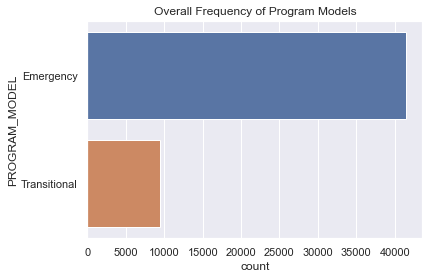

In [9]:
# Setting the "darkgrid" background for plot
sns.set(style="darkgrid")

# Create a countplot to show the frequency of PROGRAM_MODEL.
sns.countplot(y=mydata['PROGRAM_MODEL'])

# Set title
plt.title("Overall Frequency of Program Models")

# Show the plot
plt.show()

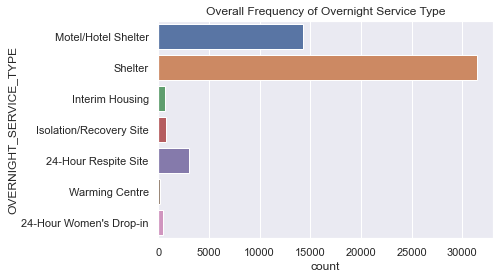

In [10]:
# Setting the "darkgrid" background for plot
sns.set(style="darkgrid")

# Create a countplot to show the frequency of OVERNIGHT_SERVICE_TYPE.
sns.countplot(y=mydata['OVERNIGHT_SERVICE_TYPE'])

# Set a title for plot
plt.title('Overall Frequency of Overnight Service Type')

# Show the plot
plt.show()

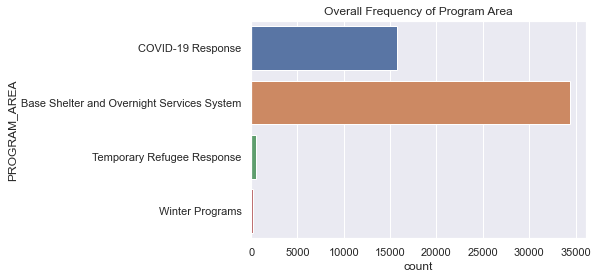

In [11]:
# Setting the "darkgrid" background for plot
sns.set(style="darkgrid")

# Create a countplot to show the frequency of PROGAM_AREA.
sns.countplot(y=mydata['PROGRAM_AREA'])

# Set a title for plot
plt.title('Overall Frequency of Program Area')

# Show the plot
plt.show()

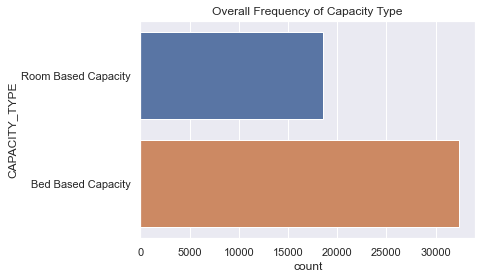

In [12]:
# Setting the "darkgrid" background for plot
sns.set(style="darkgrid")

# Create a countplot to show the frequency of CAPACITY_TYPE.
sns.countplot(y=mydata['CAPACITY_TYPE'])

# Set a title for plot
plt.title('Overall Frequency of Capacity Type')

# Show the plot
plt.show()

### For the reseach question that I decided to investigate shelters' overall Occupancy Rate. Whether or not they have significant differences and how the data are distributed.

### For the OCCUPANCY_RATE = OCCUPIED_BEDS/CAPACITY_ACTUAL_BED or OCCUPIED_ROOMS/CAPACITY_ACTUAL_ROOM

In [13]:
# Calculate the occupancy rates for beds and rooms.
mydata['OCCUPIED_RATE_FOR_BEDS'] = mydata['OCCUPIED_BEDS'] / mydata['CAPACITY_ACTUAL_BED']
mydata['OCCUPIED_RATE_FOR_ROOMS'] = mydata['OCCUPIED_ROOMS'] / mydata['CAPACITY_ACTUAL_ROOM']

# Use the function to fill null values to zero for the occupancy rates for both beds and rooms.
mydata['OCCUPIED_RATE_FOR_BEDS'].fillna(0, inplace=True)
mydata['OCCUPIED_RATE_FOR_ROOMS'].fillna(0, inplace=True)

# Creating the occupancy rate column while taking the maximum of 'OCCUPIED_RATE_FOR_BEDS' and 'OCCUPIED_RATE_FOR_ROOMS'.
mydata['OCCUPIED_RATE'] = mydata[['OCCUPIED_RATE_FOR_BEDS', 'OCCUPIED_RATE_FOR_ROOMS']].max(axis=1)

# Display the first 5 rows of the data after calculation.
mydata[['OCCUPIED_RATE_FOR_BEDS', 'OCCUPIED_RATE_FOR_ROOMS', 'OCCUPIED_RATE']].head(5)

,OCCUPIED_RATE_FOR_BEDS,OCCUPIED_RATE_FOR_ROOMS,OCCUPIED_RATE
0,0.0,0.896552,0.896552
1,0.0,1.000000,1.000000
2,0.0,0.821429,0.821429
3,0.0,1.000000,1.000000
4,0.0,0.928571,0.928571


### Data Visualization by aggregating the Occupancy Rate and each category.

In [14]:
# Using the function to groupby the data by date for different categories, and calculate the mean occupancy rates.
agg_total = mydata.groupby(['OCCUPANCY_DATE'])['OCCUPIED_RATE'].mean().reset_index()
agg_sec = mydata.groupby(['OCCUPANCY_DATE', 'SECTOR'])['OCCUPIED_RATE'].mean().reset_index()
agg_pm = mydata.groupby(['OCCUPANCY_DATE', 'PROGRAM_MODEL'])['OCCUPIED_RATE'].mean().reset_index()
agg_ser_type = mydata.groupby(['OCCUPANCY_DATE', 'OVERNIGHT_SERVICE_TYPE'])['OCCUPIED_RATE'].mean().reset_index()
agg_pa = mydata.groupby(['OCCUPANCY_DATE', 'PROGRAM_AREA'])['OCCUPIED_RATE'].mean().reset_index()
agg_cap_type = mydata.groupby(['OCCUPANCY_DATE', 'CAPACITY_TYPE'])['OCCUPIED_RATE'].mean().reset_index()

# Check the one of (PROGRAM_MODEL) the head of the dataset after groupby
agg_pm.head()

,OCCUPANCY_DATE,PROGRAM_MODEL,OCCUPIED_RATE
0,2021-01-01,Emergency,0.943097
1,2021-01-01,Transitional,0.877665
2,2021-01-02,Emergency,0.945223
3,2021-01-02,Transitional,0.876508
4,2021-01-03,Emergency,0.942217


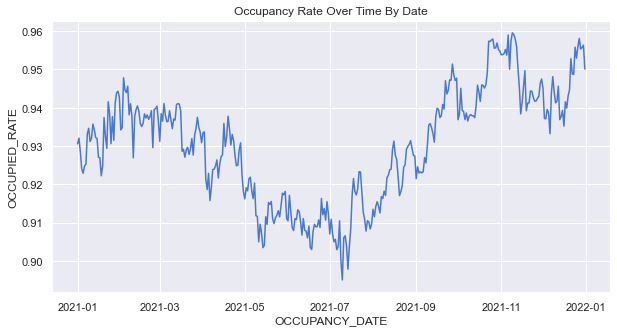

In [15]:
# Visualized the Occupancy Rate over Time using aggregate total data
# set the "darkgrid" background for the plot

sns.set(style='darkgrid', palette="muted")
plt.figure(figsize=(10, 5))

# Use the lineplot with seaborn package
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_RATE', data=agg_total)

# set the title for lineplot
plt.title('Occupancy Rate Over Time By Date')
# display the plot
plt.show()

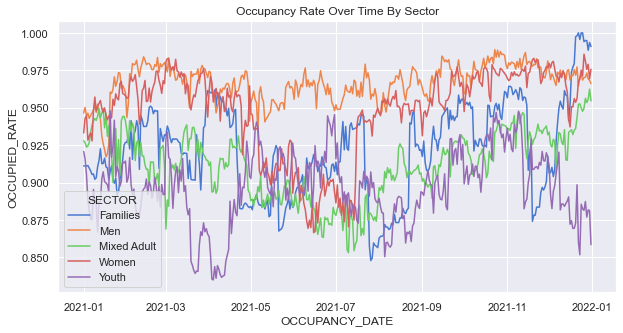

In [16]:
# Visualized the Occupancy Rate over Time using the SECTOR data
# set the "darkgrid" background for the plot

sns.set(style='darkgrid', palette="muted")
plt.figure(figsize=(10, 5))

# Use the lineplot with seaborn package
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_RATE', hue = 'SECTOR', data=agg_sec)

# set the title for lineplot
plt.title('Occupancy Rate Over Time By Sector')
# display the plot
plt.show()

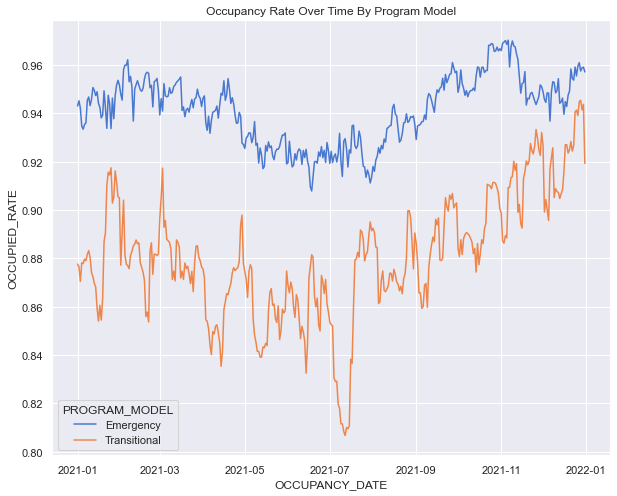

In [17]:
# Visualized the Occupancy Rate over Time using the PROGRAM_MODEL data
# set the "darkgrid" background for the plot

sns.set(style='darkgrid', palette="muted")
plt.figure(figsize=(10, 8))

# Use the lineplot with seaborn package
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_RATE', hue = 'PROGRAM_MODEL', data=agg_pm)

# set the title for lineplot
plt.title('Occupancy Rate Over Time By Program Model')
# display the plot
plt.show()

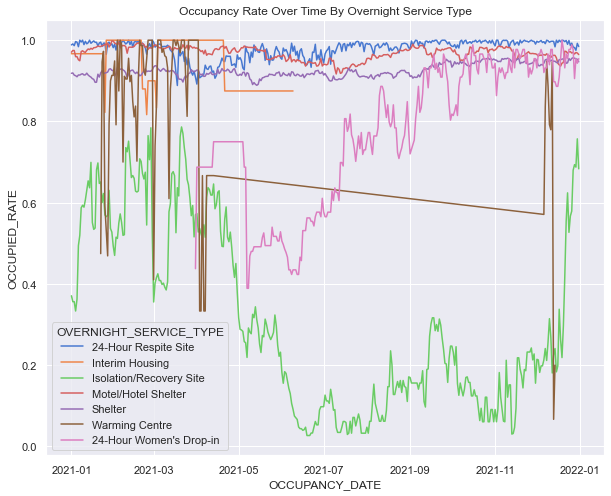

In [18]:
# Visualized the Occupancy Rate over Time using the OVERNIGHT_SERVICE_TYPE data
# set the "darkgrid" background for the plot

sns.set(style='darkgrid', palette="muted")
plt.figure(figsize=(10, 8))

# Use the lineplot with seaborn package
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_RATE', hue = 'OVERNIGHT_SERVICE_TYPE', data=agg_ser_type)

# set the title for lineplot
plt.title('Occupancy Rate Over Time By Overnight Service Type')
# display the plot
plt.show()

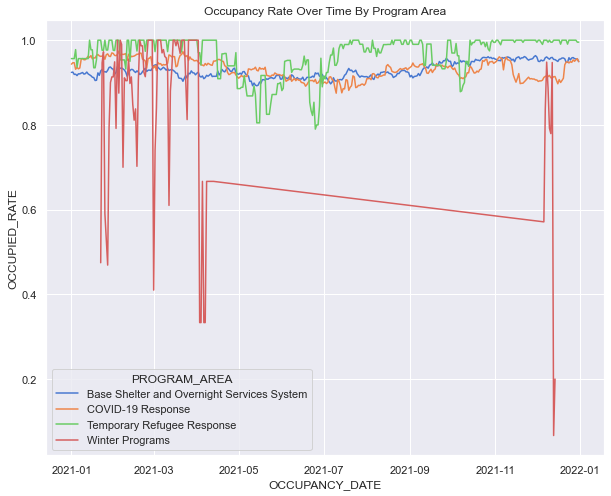

In [19]:
# Visualized the Occupancy Rate over Time using the PROGRAM_AREA data
# set the "darkgrid" background for the plot

sns.set(style='darkgrid', palette="muted")
plt.figure(figsize=(10, 8))

# Use the lineplot with seaborn package
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_RATE', hue = 'PROGRAM_AREA', data=agg_pa)

# set the title for lineplot
plt.title('Occupancy Rate Over Time By Program Area')
# display the plot
plt.show()

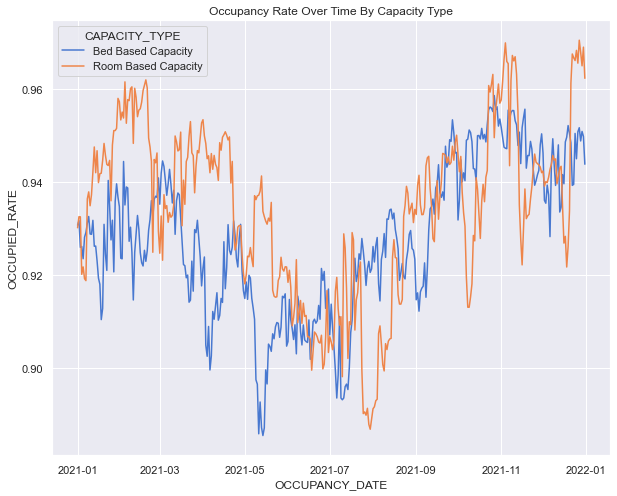

In [20]:
# Visualized the Occupancy Rate over Time using the CAPACITY_TYPE data
# set the "darkgrid" background for the plot

sns.set(style='darkgrid', palette="muted")
plt.figure(figsize=(10, 8))

# Use the lineplot with seaborn package
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_RATE', hue = 'CAPACITY_TYPE', data=agg_cap_type)

# set the title for lineplot
plt.title('Occupancy Rate Over Time By Capacity Type')
# display the plot
plt.show()

### Multivariate Visualization: Analysis between the Occupancy Rate and different categories.

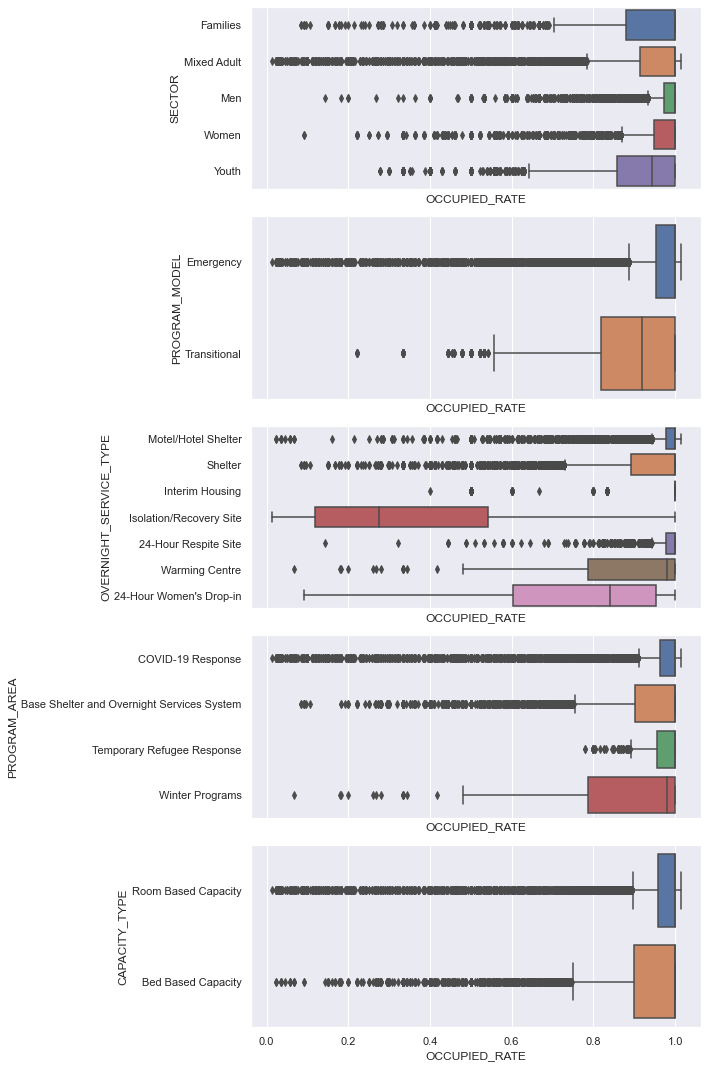

In [21]:
# Setting the "darkgrid" background for plot
sns.set(style="darkgrid")
# Create the boxplots for different categories
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15), sharex=True)

# SECTOR category
sns.boxplot(x='OCCUPIED_RATE', y='SECTOR', data=mydata, ax=axes[0], orient='h')
axes[0].set_title = ('Boxplot For Occupancy Rate By SECTOR')

# PROGRAM_MODEL category
sns.boxplot(x='OCCUPIED_RATE', y='PROGRAM_MODEL', data=mydata, ax=axes[1], orient='h')
axes[1].set_title = ('Boxplot For Occupancy Rate By PROGRAM_MODEL')

# OVERINIGHT_SERVICE_TYPE category
sns.boxplot(x='OCCUPIED_RATE', y='OVERNIGHT_SERVICE_TYPE', data=mydata, ax=axes[2], orient='h')
axes[2].set_title = ('Boxplot For Occupancy Rate By OVERNIGHT_SERVICE_TYPE')

# PROGRAM_AREA category
sns.boxplot(x='OCCUPIED_RATE', y='PROGRAM_AREA', data=mydata, ax=axes[3], orient='h')
axes[3].set_title = ('Boxplot For Occupancy Rate By PROGRAM_AREA')

# CAPACITY_TYPE
sns.boxplot(x='OCCUPIED_RATE', y='CAPACITY_TYPE', data=mydata, ax=axes[4], orient='h')
axes[4].set_title = ('Boxplot For Occupancy Rate By CAPACITY_TYPE')

# Setting layout to avoid overlapping
plt.tight_layout()
# Show the plots
plt.show()

# Conduct t-test for different categories' group.

In [22]:
# Filter the data for categories of PROGRAM_MODEL (Emergency and Transitional data)
emerg = mydata[mydata['PROGRAM_MODEL'] == 'Emergency']['OCCUPIED_RATE']
trans = mydata[mydata['PROGRAM_MODEL'] == 'Transitional']['OCCUPIED_RATE']

# Conduct the t-test
t_stat, p_value = ttest_ind(emerg, trans, nan_policy='omit')

# Display the results
t_stat, p_value
print(f"t-value = {t_stat}")
print(f"p-value = {p_value}")

# As we can see the p-value is super small than the alpha level at 5% significant level.
# We need reject the null hypothesis, as we have sufficient evidence that there has statistical significance among the group.

t-value = 39.04455484711919
p-value = 0.0


In [23]:
# Filter the data for categories of PROGRAM_AREA (COVID-19 Response and Winter Programs)
covid_res = mydata[mydata['PROGRAM_AREA'] == 'COVID-19 Response']['OCCUPIED_RATE']
winter_p = mydata[mydata['PROGRAM_AREA'] == 'Winter Programs']['OCCUPIED_RATE']

# Conduct the t-test
t_stat, p_value = ttest_ind(covid_res,winter_p, nan_policy='omit')

# Display the results
t_stat, p_value
print(f"t-value = {t_stat}")
print(f"p-value = {p_value}")

# As we can see the p-value is super small than the alpha level at 5% significant level.
# We need reject the null hypothesis, as we have sufficient evidence that there has statistical significance among the group.

t-value = 5.6741534258206725
p-value = 1.4179919102362063e-08


In [24]:
# Filter the data for categories of CAPACITY_TYPE (Room Based Capacity and Bed Based Capacity)
rm_based_cap = mydata[mydata['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPIED_RATE']
bed_based_cap = mydata[mydata['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPIED_RATE']

# Conduct the t-test
t_stat, p_value = ttest_ind(rm_based_cap, bed_based_cap, nan_policy='omit')

# Display the results
t_stat, p_value
print(f"t-value = {t_stat}")
print(f"p-value = {p_value}")

# As we can see the p-value is super small than the alpha level at 5% significant level.
# We need reject the null hypothesis, as we have sufficient evidence that there has statistical significance among the group.

t-value = 4.786957045526265
p-value = 1.6980372727677477e-06


In [26]:
# Filter the data for categories of OVERNIGHT_SERVICE_TYPE (Motel/Hotel Shelter and Warming Centre data)
hotel_s = mydata[mydata['OVERNIGHT_SERVICE_TYPE'] == 'Motel/Hotel Shelter']['OCCUPIED_RATE']
warm_centre = mydata[mydata['OVERNIGHT_SERVICE_TYPE'] == 'Warming Centre']['OCCUPIED_RATE']

# Conduct the t-test
t_stat, p_value = ttest_ind(hotel_s, warm_centre, nan_policy='omit')

# Display the results
t_stat, p_value
print(f"t-value = {t_stat}")
print(f"p-value = {p_value}")

# # As we can see the p-value is super small than the alpha level at 5% significant level.
# We need reject the null hypothesis, as we have sufficient evidence that there has statistical significance among the group.

t-value = 16.796204818698236
p-value = 1.0244830363910635e-62
